<a href="https://colab.research.google.com/github/michaelthephoenix/CO2-emissions-Exporatory-data-analysis/blob/main/Rwanda_Carbon_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to Rwanda Carbon Prediction Challenge
About the problem

The ability to accurately monitor carbon emissions is a critical step in the fight against climate change. Precise carbon readings allow researchers and governments to understand the sources and patterns of carbon mass output. While Europe and North America have extensive systems in place to monitor carbon emissions on the ground, there are few available in Africa.


Objective of this challenge

The objective of this challenge is to create machine learning or a deep learning model using open-source CO2 emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

 These solutions will enable governments and other actors to estimate carbon emission levels across Africa, even in places where on-the-ground monitoring is not possible.

 Solution from kaggle
 [link text](https://www.kaggle.com/code/inversion/getting-started-modeling)

In [ ]:
from ast import increment_lineno
from IPython.display import display
# Import libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm

import geopandas as gpd
from shapely.geometry import Point
import folium

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
# Loading and previewing data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51000,29.29000,2019,0,-0.00011,0.60302,-0.00007,0.25567,-98.59389,...,3664.43622,61085.80957,2615.12048,15.56853,0.27229,-12.62899,35.63242,-138.78642,30.75214,3.75099
1,ID_-0.510_29.290_2019_01,-0.51000,29.29000,2019,1,0.00002,0.72821,0.00001,0.13099,16.59286,...,3651.19031,66969.47873,3174.57242,8.69060,0.25683,30.35938,39.55763,-145.18393,27.25178,4.02518
2,ID_-0.510_29.290_2019_02,-0.51000,29.29000,2019,2,0.00051,0.74820,0.00038,0.11002,72.79584,...,4216.98649,60068.89445,3516.28267,21.10341,0.25110,15.37788,30.40182,-142.51954,26.19330,4.23138
3,ID_-0.510_29.290_2019_03,-0.51000,29.29000,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.50774,51064.54734,4180.97332,15.38690,0.26204,-11.29340,24.38036,-132.66583,28.82915,4.30529
4,ID_-0.510_29.290_2019_04,-0.51000,29.29000,2019,4,-0.00008,0.67630,-0.00005,0.12116,4.12127,...,3980.59812,63751.12578,3355.71011,8.11469,0.23585,38.53226,37.39298,-141.50981,22.20461,4.34732


In [ ]:
# Checking size and shape of dataset

train.shape

(11597, 76)

In [ ]:
# Statistical Summaries

train.describe(include = 'all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,11597,11597.00000,11597.00000,11597.00000,11597.00000,9815.00000,9815.00000,9815.00000,9815.00000,9815.00000,...,11597.00000,11597.00000,11597.00000,11597.00000,11597.00000,11597.00000,11596.00000,11596.00000,11596.00000,11596.00000
unique,11597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-0.510_29.290_2019_00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-0.87120,30.02649,2019.99914,25.98146,0.00003,0.84531,0.00003,0.15512,-8.37499,...,5856.72148,57863.02208,4930.91591,19.85039,0.28786,-10.93122,40.23474,-88.32681,27.76884,64.11290
std,NaN,0.15687,0.67176,0.81636,15.29104,0.00025,0.17238,0.00019,0.07049,63.30228,...,1463.09264,9100.81324,1398.06076,14.08305,0.04393,29.29690,6.30130,38.00593,4.27074,82.10756
min,NaN,-1.07000,28.83800,2019.00000,0.00000,-0.00094,0.40938,-0.00085,0.00000,-114.16899,...,1050.66178,28327.54860,1050.49682,1.84453,0.08132,-101.49892,13.65586,-153.46421,10.81829,0.00382
25%,NaN,-0.99700,29.49700,2019.00000,13.00000,-0.00010,0.72647,-0.00008,0.10817,-56.24582,...,4841.77461,51683.29645,3928.44248,10.27990,0.25750,-29.93736,35.60922,-127.11923,24.56169,6.62977
50%,NaN,-0.91500,29.87500,2020.00000,26.00000,0.00002,0.81698,0.00002,0.15788,-12.31771,...,5856.86299,57563.69371,4899.67097,15.61247,0.28710,-12.69105,41.01360,-87.74639,28.19089,34.15199
75%,NaN,-0.78500,30.48000,2021.00000,39.00000,0.00014,0.94466,0.00011,0.20670,71.61853,...,6833.87807,63973.86482,5868.38325,24.69737,0.31727,5.16121,44.15620,-49.44671,31.36380,89.35526


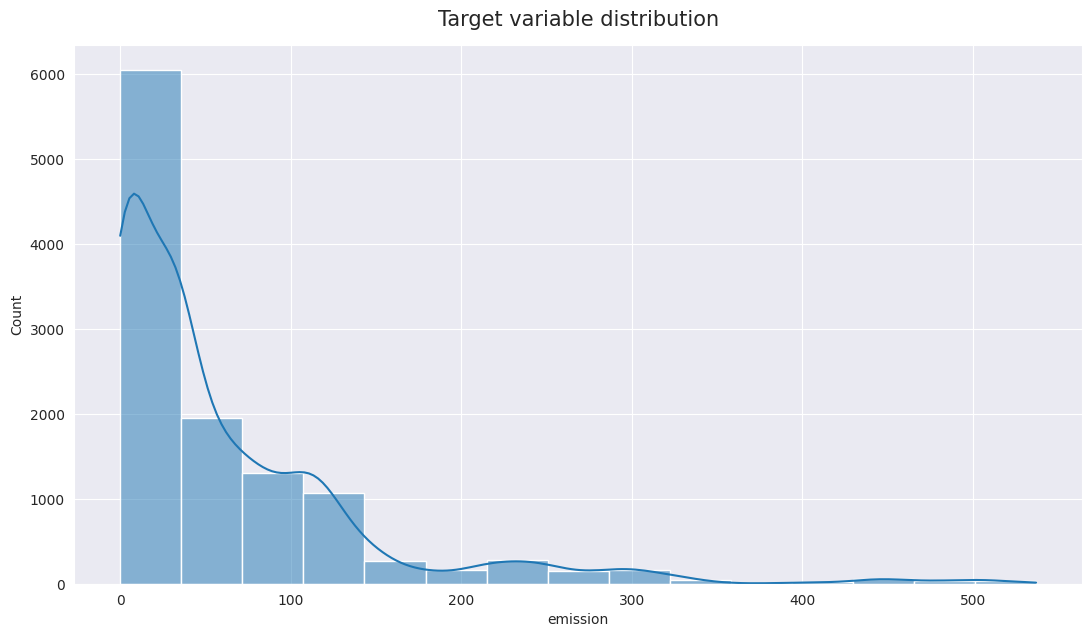

None

2.4411622346211357

In [ ]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())

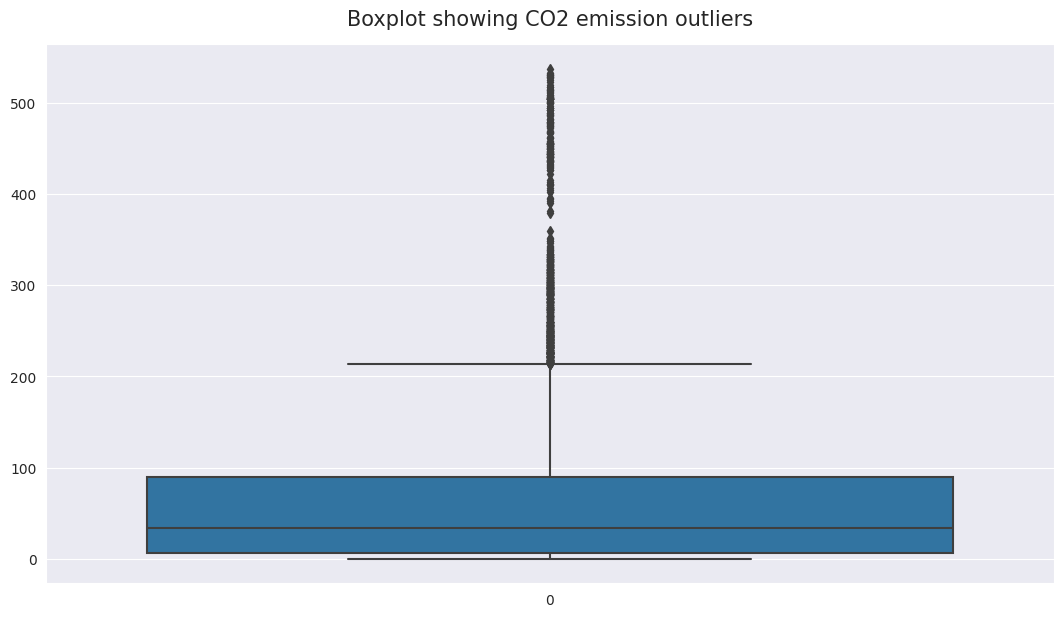

In [ ]:
# Plotting boxplot for the CO2 emissions
sns.set_style('darkgrid')
plt.figure(figsize=(13, 7))
sns.boxplot(train.emission)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)
plt.show()

Outliers are those data points which differ significantly from other observations present in given dataset.

Suggestions on how to handle outliers:

* Transforming the outliers by scaling - log

transformation, box-cox transformation ...
* Dropping outliers
* Imputation by replacing outliers with mean, median ...

Geo Visualisation - EDA

In [ ]:
%%capture
# Install relevant libraries
!pip install geopandas folium

In [ ]:
# Combine train and test for easy visualisation
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])

test_coords = test.drop_duplicates(subset = ['latitude', 'longitude'])

train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(all_data[['latitude', 'longitude', 'set_type']], geometry = geometry)

# Preview the geopandas df
geo_df.head()

,latitude,longitude,set_type,geometry
0,-0.51000,29.29000,train,POINT (29.29000 -0.51000)
1,-0.52800,29.47200,train,POINT (29.47200 -0.52800)
2,-0.54700,29.65300,train,POINT (29.65300 -0.54700)
3,-0.56900,30.03100,train,POINT (30.03100 -0.56900)
4,-0.59800,29.10200,train,POINT (29.10200 -0.59800)


In [ ]:

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.

i = 0
for  coordinates in geo_df_list:
  #assign a color maker  for the type set
  if geo_df.set_type[i] == 'train':
    type_color = 'green'
  elif geo_df.set_type[i] == 'test':
    type_color = 'orange'

  # Place the makers
  all_data_map.add_child(
      folium.CircleMarker(
          location=coordinates,
          radius= 1,
          weight = 4,
          zoom = 10,
          popup= 'Set: ' + str(geo_df.set_type[i]) + '<br>'
          "Coordinates: " + str([round(x,2) for x in geo_df_list[i]]),

          color = type_color),
      )
  i = i + 1
  all_data_map.fit_bounds(all_data_map.get_bounds())
  all_data_map

In [ ]:
train.isnull().sum().any(), test.isnull().sum().any()

(True, True)

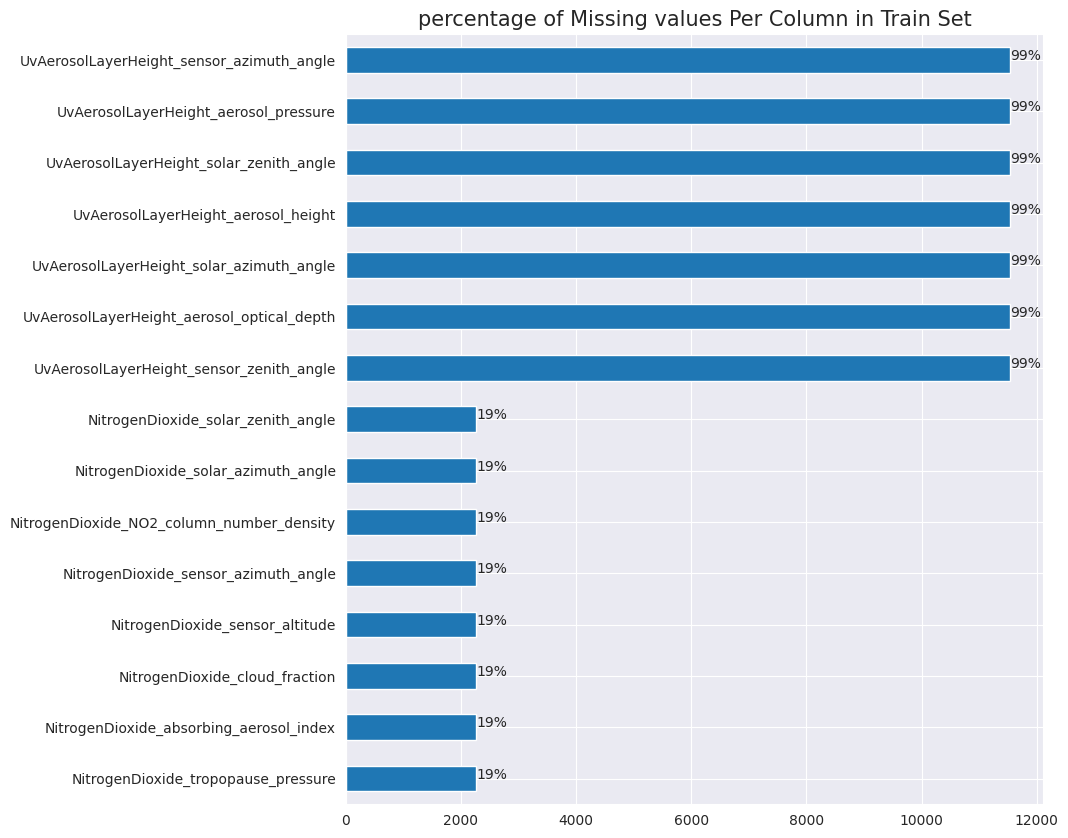

In [ ]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9,10))
plt.title('percentage of Missing values Per Column in Train Set', fontdict={'size' :15})

for p in ax.patches:
  percentage = '{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
  width, height = p.get_width(), p.get_height()
  x = p.get_x() + width + 0.02
  y = p.get_y() + height/2
  ax.annotate(percentage, (x,y))

In [ ]:
train.duplicated().any(), test.duplicated().any()

(False, False)

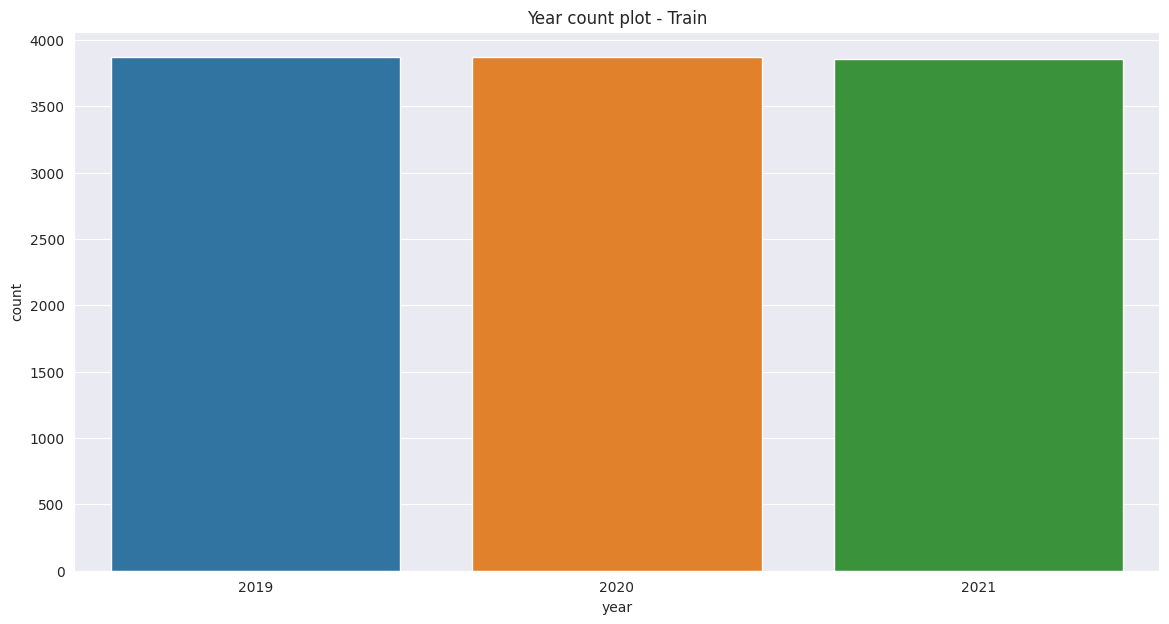

In [ ]:
# Date features EDA
#Year countplot

plt.figure(figsize = (14, 7))
sns.countplot(x = 'year', data = train)
plt.title('Year count plot - Train')
plt.show()

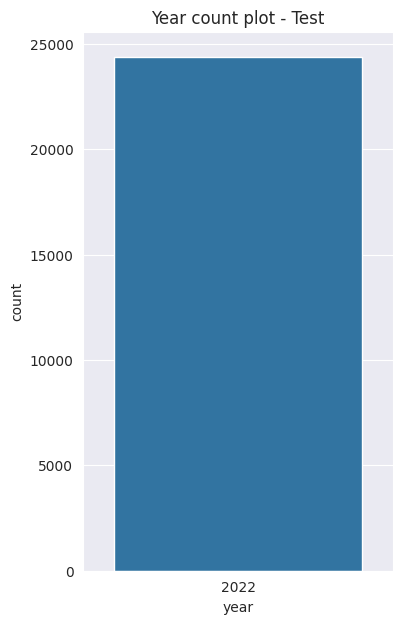

In [ ]:
# Year countplot
plt.figure(figsize = (4, 7))
sns.countplot(x = 'year', data = test)
plt.title('Year count plot - Test')
plt.show()

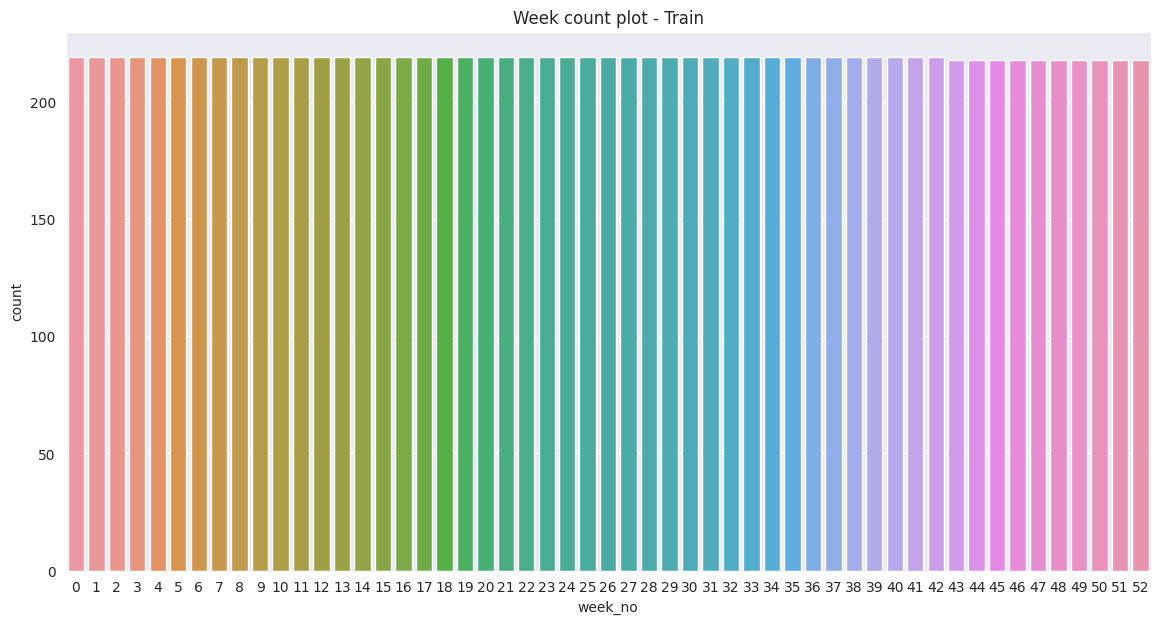

In [ ]:
# Week countplot
plt.figure(figsize = (14,7))
sns.countplot(x = 'week_no', data= train)
plt.title('Week count plot - Train')
plt.show()

In [ ]:
train.drop_duplicates(subset = ['year', 'week_no']).groupby(['year'])[['week_no']].count()

,week_no
year,
2019,53
2020,53
2021,53


Correlations - EDA

In [ ]:
# Top 20 correlated features to the target
top20_corrs = abs(train.corr()['emission']).sort_values(ascending = False).head(20)
top20_corrs

emission                                                   1.00000
longitude                                                  0.38680
latitude                                                   0.21778
UvAerosolLayerHeight_solar_azimuth_angle                   0.10996
CarbonMonoxide_CO_column_number_density                    0.08733
UvAerosolLayerHeight_solar_zenith_angle                    0.08217
UvAerosolIndex_sensor_altitude                             0.07843
UvAerosolLayerHeight_sensor_zenith_angle                   0.07705
CarbonMonoxide_H2O_column_number_density                   0.07568
Formaldehyde_tropospheric_HCHO_column_number_density       0.07172
NitrogenDioxide_sensor_altitude                            0.06541
UvAerosolLayerHeight_aerosol_height                        0.06492
UvAerosolLayerHeight_aerosol_pressure                      0.06155
Formaldehyde_HCHO_slant_column_number_density              0.05932
CarbonMonoxide_sensor_altitude                             0.0

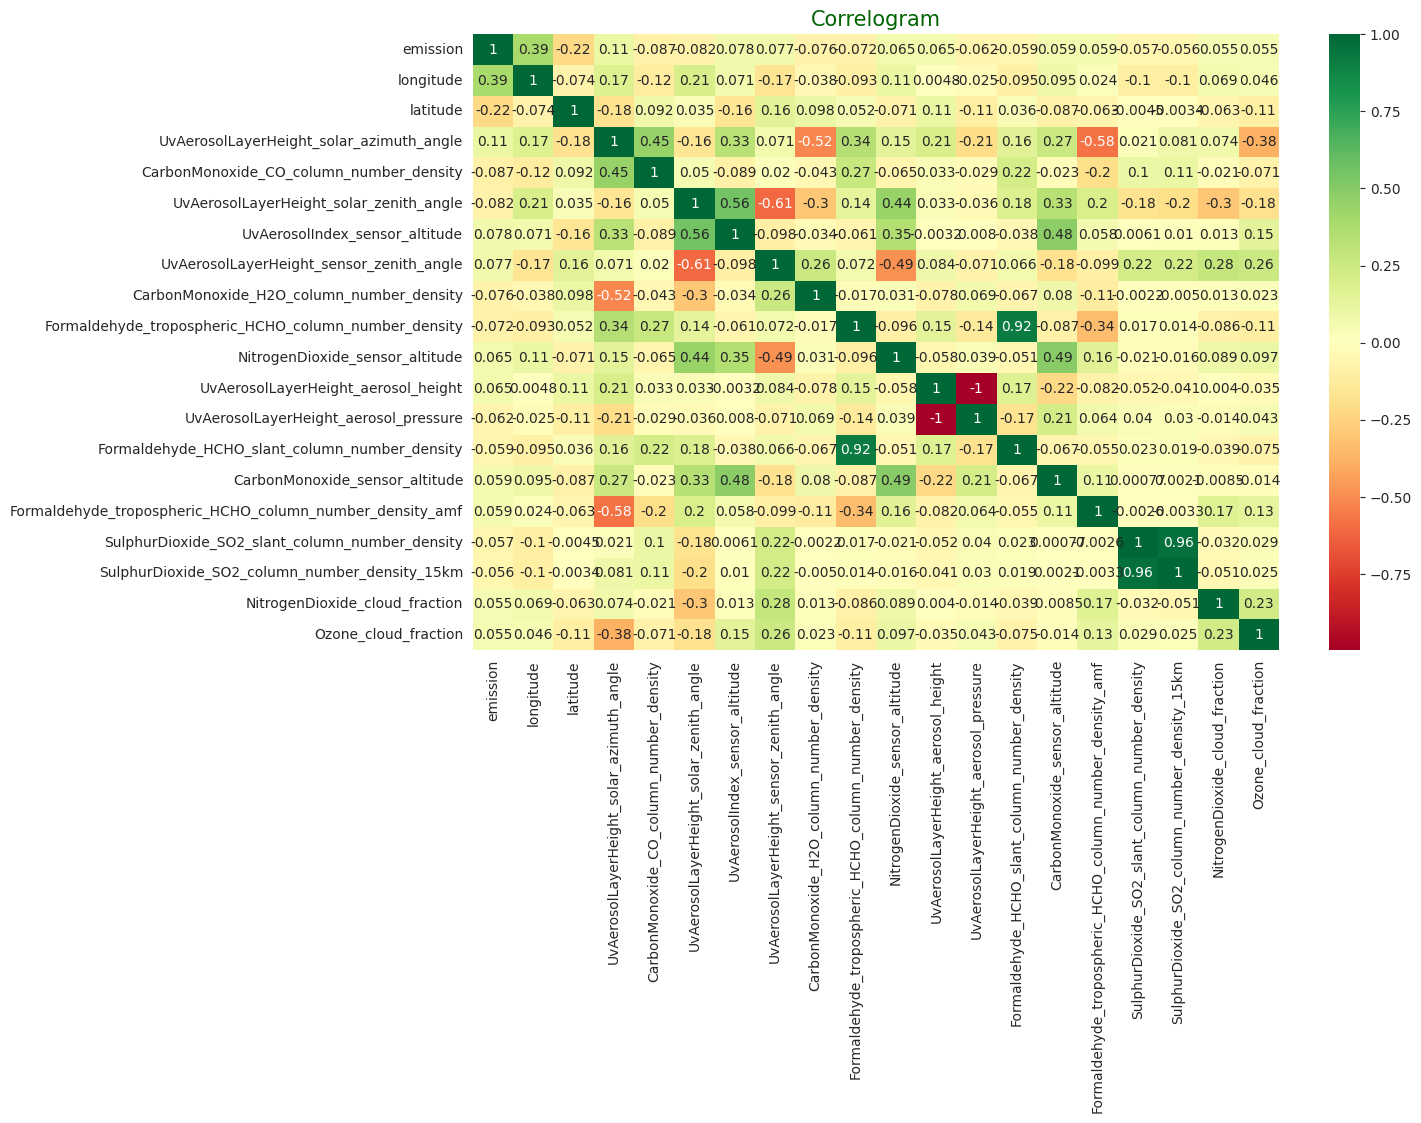

In [ ]:
# Quantify correlations between features

corr = train[list(top20_corrs.index)].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap = 'RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Timeseries visualization

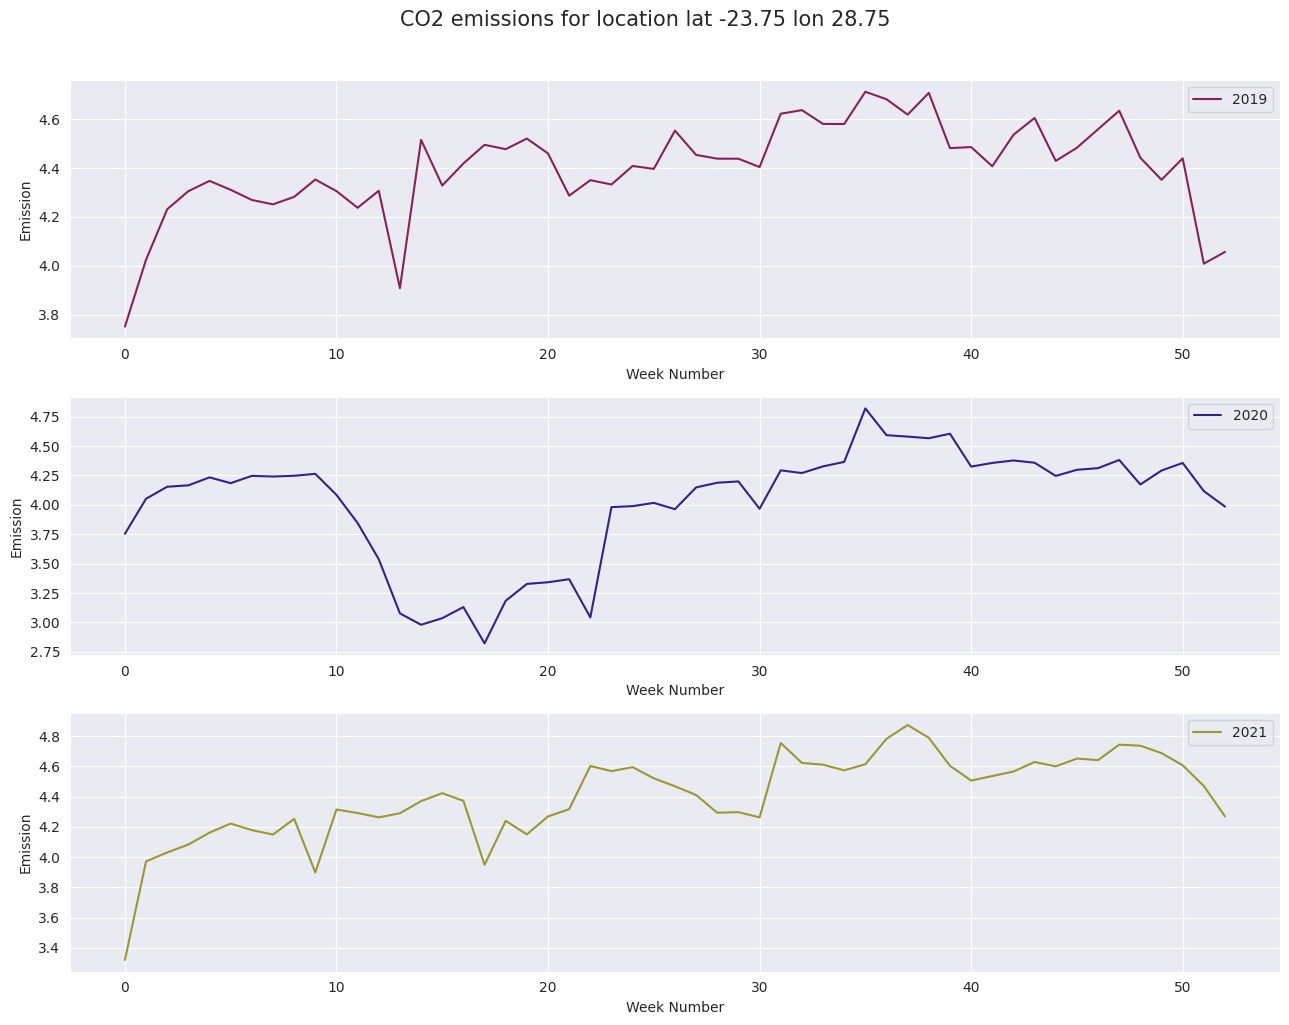

In [ ]:
# Filter data for the specific location
sample_loc = train[(train['latitude'] == -0.51000) & (train['longitude'] ==  29.29000)]

# Plot a line plot
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(13, 10))
fig.suptitle('CO2 emissions for location lat -23.75 lon 28.75', y=1.02, fontsize=15)

# Iterate over unique years and plot emissions
unique_years = sample_loc['year'].unique()
colors = ['#882255', '#332288', '#999933', 'orangered']  # Add more colors if needed

for ax, year, color in zip(axes.flatten(), unique_years, colors):
    df = sample_loc[sample_loc['year'] == year]
    sns.lineplot(x=df['week_no'], y=df['emission'], ax=ax, label=str(year), color=color)

for ax in axes:
    ax.set_xlabel('Week Number')
    ax.set_ylabel('Emission')
    ax.legend()

plt.tight_layout()
plt.show()

Feature Engineering

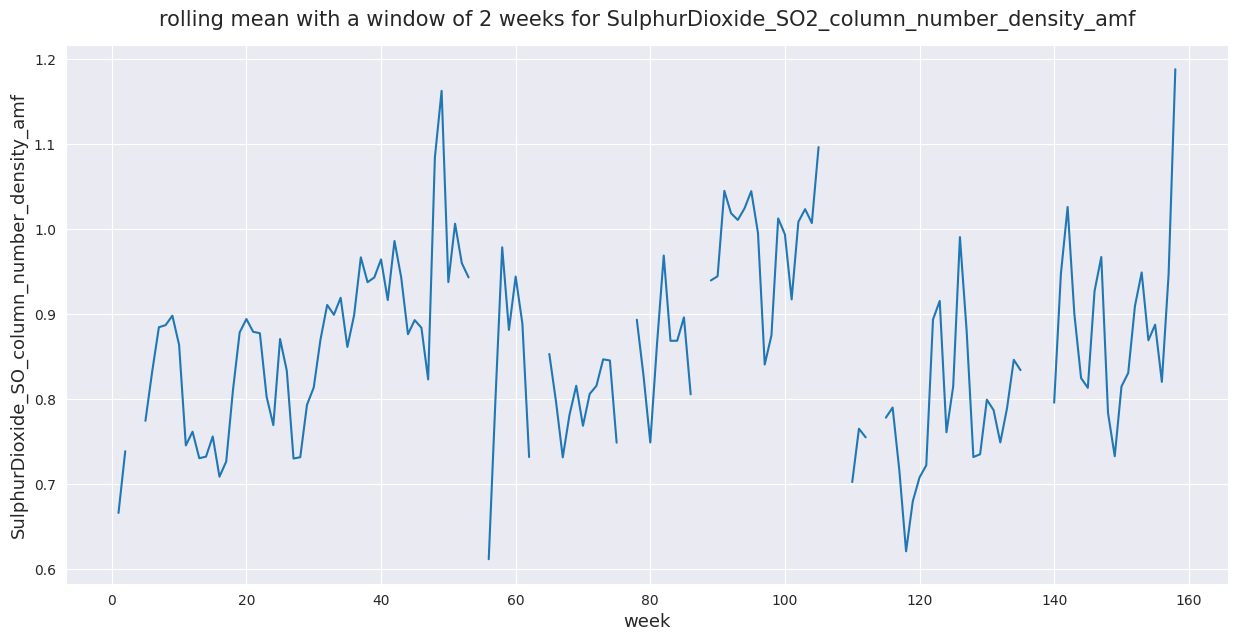

In [ ]:
# Example of feature engineering - Aggregations, cumulative differences,
# moving averages ...
# lets explore the rolling mean
# First we create a unique locaton from lat lon

train['location'] = [str(x) + '_' + str(y) for x, y
                     in zip(train.latitude, train.longitude)]

# Filter based on one location
example_loc = train[train.location == '-0.51_29.29']

# Calculate rolling mean for SulpurDioxide_SO2_column_number_density_amf
# with a window of 2 weeks
rolling_mean = example_loc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window = 2).mean()

# Visualise rolling mean
plt.figure(figsize=(15,7))
rolling_mean.plot()

plt.title('rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf',
          y = 1.02, fontsize = 15)
plt.xlabel('week', y = 1.05, fontsize = 13)
plt.ylabel('SulphurDioxide_SO_column_number_density_amf', x = 1.05, fontsize = 13)
plt.show()

In [ ]:
# Generate the above feature - rolling mean for all locations for both the train and test

# Feature engineering train
train_roll_mean = train.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[train.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
train_roll_mean.drop(['level_1', 'emission', 'location'], axis = 1, inplace = True)
train_roll_mean.columns = [col + '_roll_mean' for col in train_roll_mean.columns]

# Feature engineering test
test.latitude, test.longitude = round(test.latitude, 2), round(test.longitude, 2)
test['location'] = [str(x) + '_' + str(y) for x, y in zip(test.latitude, test.longitude)]
test_roll_mean = test.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[test.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
test_roll_mean.drop(['level_1', 'location'], axis = 1, inplace = True)
test_roll_mean.columns =  [col + '_roll_mean' for col in test_roll_mean.columns]
test_roll_mean.head()

,SulphurDioxide_SO2_column_number_density_roll_mean,SulphurDioxide_SO2_column_number_density_amf_roll_mean,SulphurDioxide_SO2_slant_column_number_density_roll_mean,SulphurDioxide_cloud_fraction_roll_mean,SulphurDioxide_sensor_azimuth_angle_roll_mean,SulphurDioxide_sensor_zenith_angle_roll_mean,SulphurDioxide_solar_azimuth_angle_roll_mean,SulphurDioxide_solar_zenith_angle_roll_mean,SulphurDioxide_SO2_column_number_density_15km_roll_mean,CarbonMonoxide_CO_column_number_density_roll_mean,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42280.88229,7474.23040,47981.82304,6474.23032,9.69203,0.26695,-65.31206,38.04982,-135.84018,32.39598
2,0.00031,0.64814,0.00021,0.03993,17.09193,27.74483,-138.71941,29.47540,0.00011,0.03772,...,41336.40886,7730.47151,46960.90116,6730.47143,11.10081,0.28012,4.28852,44.16954,-141.70891,28.87787
3,0.00026,0.65101,0.00017,0.14045,15.05711,49.37580,-144.95421,25.93065,0.00007,0.03877,...,42494.03577,7499.75988,48326.23106,6499.75991,11.25887,0.28590,7.31112,44.03845,-139.90644,28.17407
4,0.00002,0.63872,0.00003,0.20269,74.18022,37.25428,-144.39710,23.06746,0.00001,0.03949,...,48724.83811,6432.00227,55271.45512,5432.00225,12.41494,0.29445,-18.68649,36.13153,-135.26400,27.94079


In [ ]:
# Merge engineered features with train and test set

#Train
train_eng = train.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(train_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Test
test_eng = test.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(test_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Preview engineered test set
test_eng.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,ID_-0.510_29.290_2022_00,-0.51000,29.29000,2022,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_-0.510_29.290_2022_01,-0.51000,29.29000,2022,1,0.00046,0.69116,0.00032,0.00000,76.23920,...,42280.88229,7474.23040,47981.82304,6474.23032,9.69203,0.26695,-65.31206,38.04982,-135.84018,32.39598
2,ID_-0.510_29.290_2022_02,-0.51000,29.29000,2022,2,0.00016,0.60511,0.00011,0.07987,-42.05534,...,41336.40886,7730.47151,46960.90116,6730.47143,11.10081,0.28012,4.28852,44.16954,-141.70891,28.87787
3,ID_-0.510_29.290_2022_03,-0.51000,29.29000,2022,3,0.00035,0.69692,0.00024,0.20103,72.16957,...,42494.03577,7499.75988,48326.23106,6499.75991,11.25887,0.28590,7.31112,44.03845,-139.90644,28.17407
4,ID_-0.510_29.290_2022_04,-0.51000,29.29000,2022,4,-0.00032,0.58053,-0.00018,0.20435,76.19086,...,48724.83811,6432.00227,55271.45512,5432.00225,12.41494,0.29445,-18.68649,36.13153,-135.26400,27.94079


In [ ]:
# Selecting the independent variables and the target variable

X = train_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis = 1).fillna(0)
y = train_eng.emission.fillna(0)

print(y.isnull().count())

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Instantiating the model
clf = RandomForestRegressor(random_state = SEED, n_jobs=-1)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}') #

11597
RMSE Score: 8.682902255316439


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 81.8 MB/s eta 0:0

In [ ]:
from pycaret.regression import *

pycaret_dataset = train_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location'], axis = 1).fillna(0)

s = setup(pycaret_dataset, target = 'emission', session_id = 123)

# functional API
best = compare_models()

,Description,Value
0,Session id,123
1,Target,emission
2,Target type,Regression
3,Original data shape,"(11597, 145)"
4,Transformed data shape,"(11597, 145)"
5,Transformed train set shape,"(8117, 145)"
6,Transformed test set shape,"(3480, 145)"
7,Numeric features,144
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.5789,44.9969,6.6363,0.9933,0.3224,4.5266,13.2060
et,Extra Trees Regressor,3.5964,65.2245,8.0106,0.9902,0.1361,0.5112,21.0060
xgboost,Extreme Gradient Boosting,3.9171,69.8340,8.2866,0.9895,0.3112,3.6542,21.5500
rf,Random Forest Regressor,3.9002,87.2764,9.2770,0.9869,0.0887,0.0674,66.6080
dt,Decision Tree Regressor,4.9511,163.2926,12.6076,0.9755,0.1247,0.0819,1.2370
gbr,Gradient Boosting Regressor,11.1369,260.9854,16.1340,0.9605,0.7612,19.9221,28.1830
ada,AdaBoost Regressor,29.7259,1354.8180,36.7697,0.7945,1.2752,43.5135,7.5120
br,Bayesian Ridge,50.4289,5507.6176,74.0829,0.1727,1.4952,89.2471,0.5280
lasso,Lasso Regression,50.3238,5523.0204,74.1926,0.1702,1.5222,95.7615,1.3900
llar,Lasso Least Angle Regression,50.3343,5525.2645,74.2075,0.1698,1.5224,95.6470,0.1410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# functional API
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['latitude', 'longitude', 'year',
                                              'week_no',
                                              'SulphurDioxide_SO2_column_number_density',
                                              'SulphurDioxide_SO2_column_number_density_amf',
                                              'SulphurDioxide_SO2_slant_column_number_density',
                                              'SulphurDioxide_cloud_fraction',
                                              'SulphurDioxide_sensor_azimuth_ang...
                                              'NitrogenDioxide_absorbing_aerosol_index',
                                              'NitrogenDioxide_cloud_fraction',
                                              'NitrogenDioxide_sensor_altitude',
                                              'NitrogenDioxide_sensor_azimuth_ang

In [ ]:
lr = create_model('lr')


NameError: ignored